In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
df = pd.read_csv('train_data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

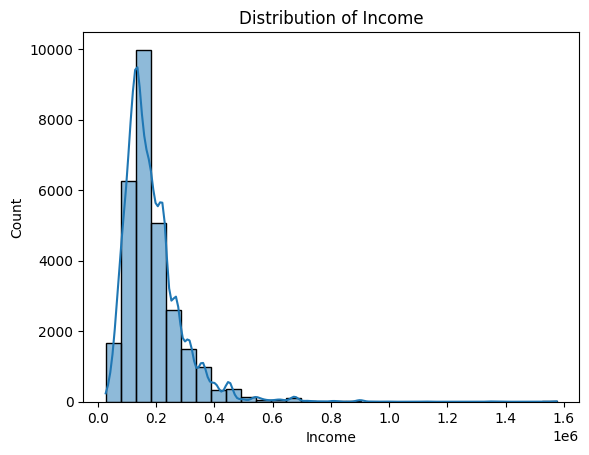

In [3]:
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.show()

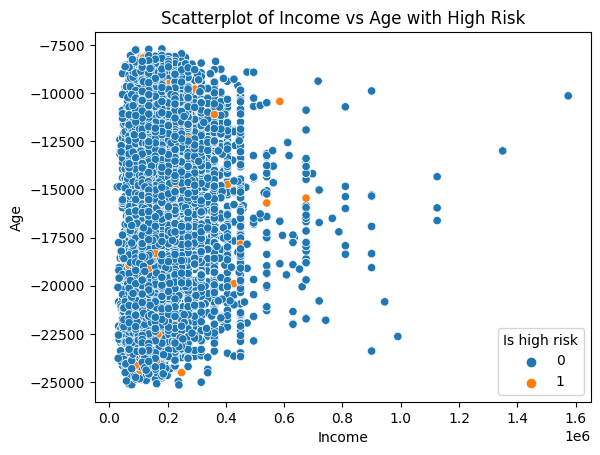

In [4]:
sns.scatterplot(x='Income', y='Age', data=df, hue='Is high risk')
plt.title('Scatterplot of Income vs Age with High Risk')
plt.show()

In [5]:
df['Family_Income'] = df['Income'] * (1 + 0.1 * df['Family member count'])

In [8]:
df.dropna(inplace=True)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
scaler = StandardScaler()
df[['Income', 'Age']] = scaler.fit_transform(df[['Income', 'Age']])


In [12]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Has a car'] = label_encoder.fit_transform(df['Has a car'])
df['Has a property'] = label_encoder.fit_transform(df['Has a property'])
df['Employment status'] = label_encoder.fit_transform(df['Employment status'])
df['Education level'] = label_encoder.fit_transform(df['Education level'])
df['Marital status'] = label_encoder.fit_transform(df['Marital status'])
df['Dwelling'] = label_encoder.fit_transform(df['Dwelling'])
df['Has a mobile phone'] = label_encoder.fit_transform(df['Has a mobile phone'])
df['Has a work phone'] = label_encoder.fit_transform(df['Has a work phone'])
df['Has a phone'] = label_encoder.fit_transform(df['Has a phone'])
df['Has an email'] = label_encoder.fit_transform(df['Has an email'])
df['Job title'] = label_encoder.fit_transform(df['Job title'])


scaler = StandardScaler()
df[['Income', 'Age']] = scaler.fit_transform(df[['Income', 'Age']])


In [26]:
tester = pd.read_csv('test_Data.csv')


tester['Gender'] = label_encoder.fit_transform(tester['Gender'])
tester['Has a car'] = label_encoder.fit_transform(tester['Has a car'])
tester['Has a property'] = label_encoder.fit_transform(tester['Has a property'])
tester['Employment status'] = label_encoder.fit_transform(tester['Employment status'])
tester['Education level'] = label_encoder.fit_transform(tester['Education level'])
tester['Marital status'] = label_encoder.fit_transform(tester['Marital status'])
tester['Dwelling'] = label_encoder.fit_transform(tester['Dwelling'])
tester['Has a mobile phone'] = label_encoder.fit_transform(tester['Has a mobile phone'])
tester['Has a work phone'] = label_encoder.fit_transform(tester['Has a work phone'])
tester['Has a phone'] = label_encoder.fit_transform(tester['Has a phone'])
tester['Has an email'] = label_encoder.fit_transform(tester['Has an email'])
tester['Job title'] = label_encoder.fit_transform(tester['Job title'])

scaler = StandardScaler()
tester[['Income', 'Age']] = scaler.fit_transform(tester[['Income', 'Age']])

In [27]:
X = df[['Gender', 'Has a car', 'Has a property', 'Children count', 'Income', 'Age']]
y = df['Is high risk']
X_test = tester[['Gender', 'Has a car', 'Has a property', 'Children count', 'Income', 'Age']]
y_test = tester['Is high risk']

model = RandomForestClassifier()
model.fit(X,y)


RandomForestClassifier()

In [28]:
y_pred = model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9825836533187055
Confusion Matrix:
[[7165   10]
 [ 117    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7175
           1       0.00      0.00      0.00       117

    accuracy                           0.98      7292
   macro avg       0.49      0.50      0.50      7292
weighted avg       0.97      0.98      0.98      7292



In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model Development (Logistic Regression)
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# Predictions
logistic_y_pred = logistic_model.predict(X_test)

# Model Evaluation
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_conf_matrix = confusion_matrix(y_test, logistic_y_pred)
logistic_classification_rep = classification_report(y_test, logistic_y_pred, zero_division='warn')

print("Logistic Regression Model:")
print(f"Accuracy: {logistic_accuracy}")
print(f"Confusion Matrix:\n{logistic_conf_matrix}")
print(f"Classification Report:\n{logistic_classification_rep}")


Logistic Regression Model:
Accuracy: 0.9839550191991223
Confusion Matrix:
[[7175    0]
 [ 117    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7175
           1       0.00      0.00      0.00       117

    accuracy                           0.98      7292
   macro avg       0.49      0.50      0.50      7292
weighted avg       0.97      0.98      0.98      7292



c:\Users\sriyo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sriyo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sriyo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Model Development (Gradient Boosting)
gradient_boost_model = GradientBoostingClassifier()
gradient_boost_model.fit(X, y)

# Predictions
gradient_boost_y_pred = gradient_boost_model.predict(X_test)

# Model Evaluation
gradient_boost_accuracy = accuracy_score(y_test, gradient_boost_y_pred)
gradient_boost_conf_matrix = confusion_matrix(y_test, gradient_boost_y_pred)
gradient_boost_classification_rep = classification_report(y_test, gradient_boost_y_pred)

print("Gradient Boosting Model:")
print(f"Accuracy: {gradient_boost_accuracy}")
print(f"Confusion Matrix:\n{gradient_boost_conf_matrix}")
print(f"Classification Report:\n{gradient_boost_classification_rep}")


Gradient Boosting Model:
Accuracy: 0.9832693362589139
Confusion Matrix:
[[7170    5]
 [ 117    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7175
           1       0.00      0.00      0.00       117

    accuracy                           0.98      7292
   macro avg       0.49      0.50      0.50      7292
weighted avg       0.97      0.98      0.98      7292

